In [2659]:
import torch
from torch import nn # contains building block for neural networks
import matplotlib.pyplot as plt



In [2660]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

GET DATA INTO NUMERICAL REPRESENTATION

BUILD MODEL TO LEARN PATTERNS IN NUMERICAL REPRESENTATION

In [2661]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

In [2662]:
len(X), len(y)

(50, 50)

### splitting data into training and test sets

learn the pattern through the training set

evaluate the model through the test set (not be seen through training)

In [2663]:
train_split = int(0.8 *len(X))
print(f"creating index that splits the data 80/20")
X_train, X_test = X[:train_split], X[train_split:]
print(f"\nlength of train sample X: {len(X_train)}\nlength of test sample X: {len(X_test)}")
y_train, y_test = y[:train_split], y[train_split:]
print(f"\nlength of train sample y: {len(y_train)}\nlength of test sample y: {len(y_test)}")


creating index that splits the data 80/20

length of train sample X: 40
length of test sample X: 10

length of train sample y: 40
length of test sample y: 10


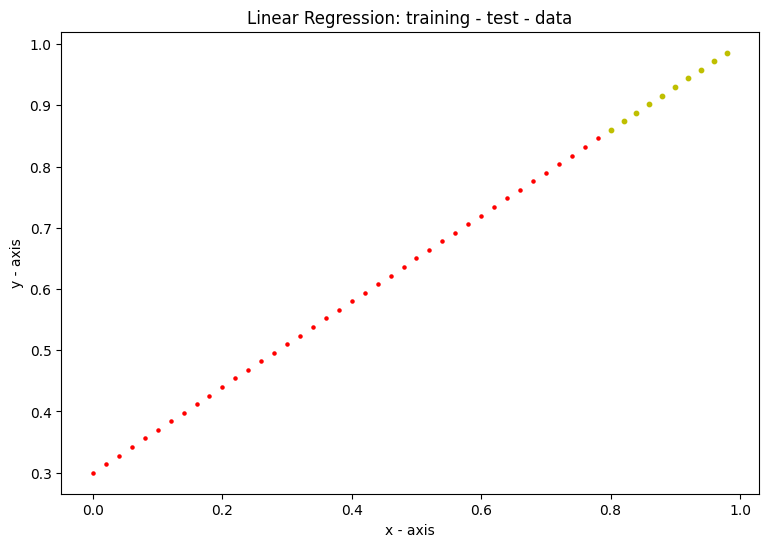

In [2664]:
def plotting_data(train_data,
                  test_data,
                  train_label,
                  test_label,
                  func=None,
                  predictions=None):

  plt.figure(figsize=(9, 6))
  plt.scatter(train_data, train_label, c="r", s=5, label="training data")
  plt.scatter(test_data, test_label, c="y", s=10, label="test data")
  plt.xlabel("x - axis")
  plt.ylabel("y - axis")
  plt.title(f"{func}: training - test - data")

  if predictions is not None:

    plt.scatter(test_data, predictions, c="m", s=5, label="predictions")

    plt.legend(prop={"size": 14});


plotting_data(X_train, X_test, y_train, y_test, "Linear Regression")

In [2665]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x):
    return self.weights * x + self.bias

In [2666]:
torch.manual_seed(42)

model_0 = LinearRegressionModelV1()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [2667]:
# passing data through the model making prediction before training
with torch.inference_mode():
  y_preds = model_0(y_test)


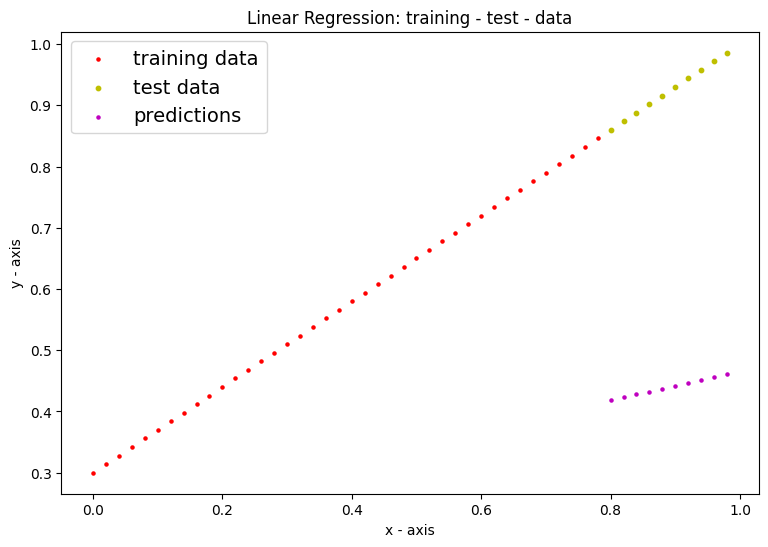

In [2668]:
plotting_data(X_train, X_test, y_train, y_test, "Linear Regression", predictions=y_preds)

In [2669]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [2670]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 140 | Loss: 0.010716589167714119 | Test Loss: 0.024059748277068138
Epoch: 160 | Loss: 0.0038517764769494534 | Test Loss: 0.008201557211577892
Epoch: 180 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882


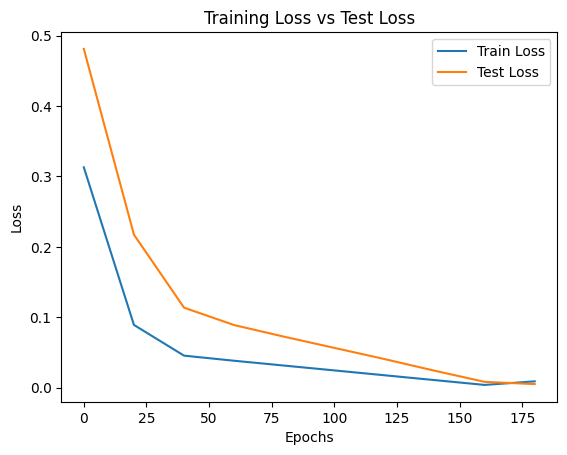

In [2671]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training Loss vs Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

tensor([0.6990]) tensor([0.3093])


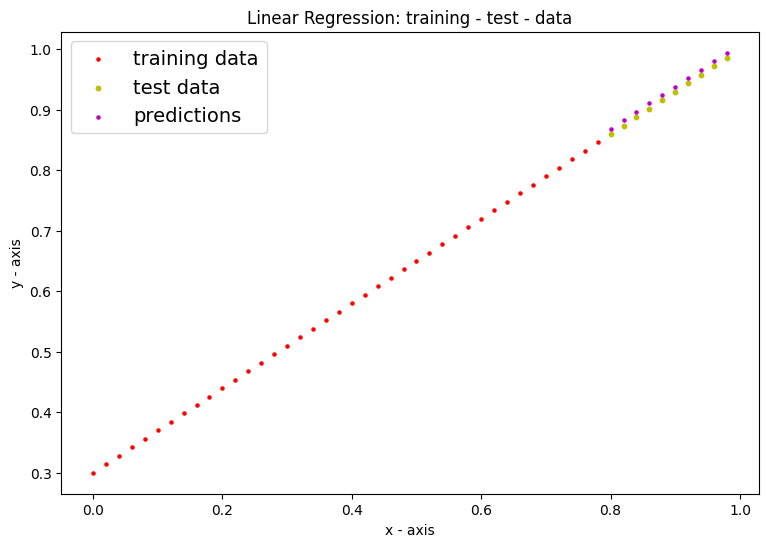

In [2672]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
print(model_0.state_dict()["weights"], model_0.state_dict()["bias"])
plotting_data(X_train, X_test, y_train, y_test, "Linear Regression", predictions=y_preds_new)

In [2673]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1,
                                  bias=True)
  def forward(self, x):
    return self.linear_layer(x)

In [2674]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
print(model_1.state_dict())
list(model_1.parameters())


OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [2675]:
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds.shape, y_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

In [2676]:
#loss_fn = nn.L1Loss()
loss_fn = nn.MSELoss()
#loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [2677]:
epochs = 3000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 300 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.3084445595741272 | Test Loss: 0.3276861310005188
Epoch: 300 | Loss: 0.0005251409602351487 | Test Loss: 0.002240691799670458
Epoch: 600 | Loss: 0.00030226499075070024 | Test Loss: 0.001320668845437467
Epoch: 900 | Loss: 0.00017405548715032637 | Test Loss: 0.0007605062564834952
Epoch: 1200 | Loss: 0.00010022948117693886 | Test Loss: 0.00043793785152956843
Epoch: 1500 | Loss: 5.771620635641739e-05 | Test Loss: 0.00025218099472112954
Epoch: 1800 | Loss: 3.3236115996260196e-05 | Test Loss: 0.00014521912089549005
Epoch: 2100 | Loss: 1.9139293726766482e-05 | Test Loss: 8.36265753605403e-05
Epoch: 2400 | Loss: 1.1021616046491545e-05 | Test Loss: 4.815687134396285e-05
Epoch: 2700 | Loss: 6.3469897213508375e-06 | Test Loss: 2.7731864975066856e-05


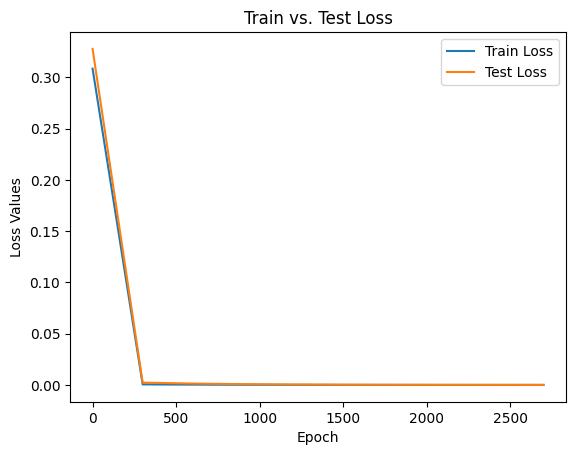

In [2678]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train vs. Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Values")
plt.legend();


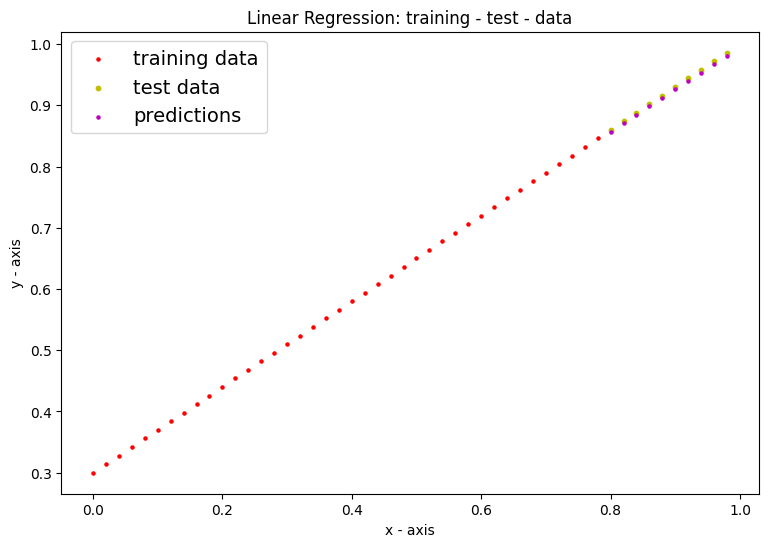

In [2679]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)
plotting_data(X_train, X_test, y_train, y_test, "Linear Regression", predictions=y_preds_new)

# NON-Linear Activations

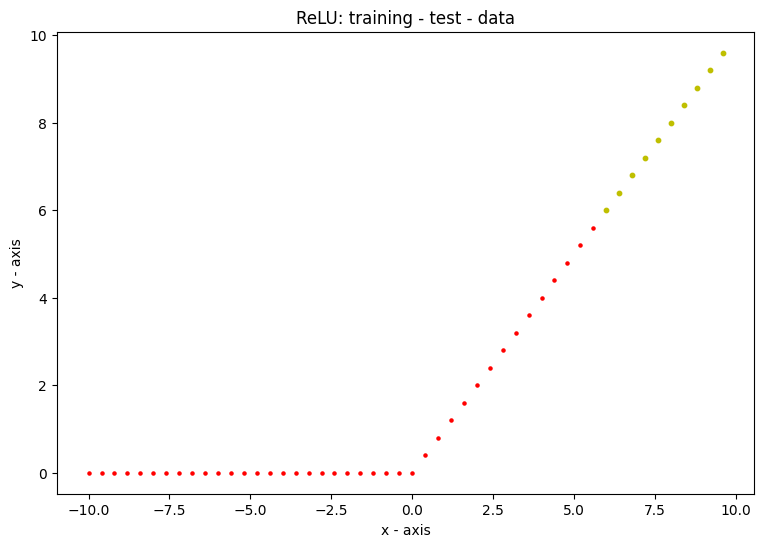

In [2680]:
A = torch.arange(-10, 10, 0.4, dtype=torch.float32)
yr = torch.maximum(torch.tensor(0), A)
train_split = int(0.8 * len(A))

A_train, A_test = A[:train_split], A[train_split:]
yr_train, yr_test = yr[:train_split], yr[train_split:]

len(A_train), len(A_test), len(yr_train), len(yr_test)

plotting_data(A_train, A_test, yr_train, yr_test, "ReLU")

In [2681]:
class ReluFunctionModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=20),
        nn.ReLU(),
        nn.Linear(in_features=20, out_features=15),
        nn.ReLU(),
        nn.Linear(in_features=15, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [2682]:
torch.manual_seed(42)
model_2 = ReluFunctionModelV1(input_features=1, output_features=1)

In [2683]:
torch.manual_seed(42)
with torch.inference_mode():
  yr_preds = model_2(A_test.unsqueeze(1))
A_train.shape, yr_train.shape

(torch.Size([40]), torch.Size([40]))

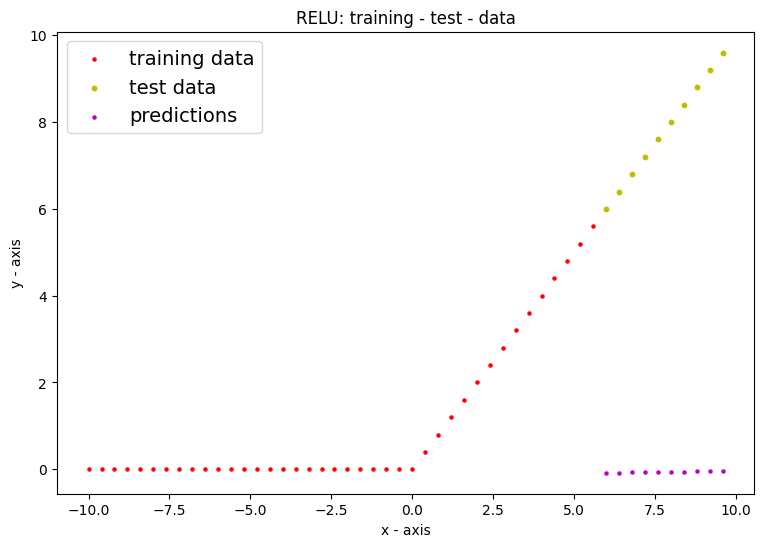

In [2684]:
plotting_data(A_train, A_test, yr_train, yr_test, "RELU", predictions=yr_preds)

In [2685]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [2686]:
epochs = 2000
epochs_count = []
loss_values = []
test_loss_values = []

A_train = A_train.unsqueeze(1)
yr_train = yr_train.unsqueeze(1)

for epoch in range(epochs):
  model_2.train()
  yr_pred = model_2(A_train)
  loss = loss_fn(yr_pred, yr_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(A_test.unsqueeze(1))
    test_loss = loss_fn(test_pred, yr_test.unsqueeze(1))

    if epoch % 200 == 0:
      epochs_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 1.131542444229126 | Test Loss: 7.823570251464844
Epoch: 200 | Loss: 0.029298018664121628 | Test Loss: 0.5489155054092407
Epoch: 400 | Loss: 0.027385959401726723 | Test Loss: 0.5393204092979431
Epoch: 600 | Loss: 0.026775429025292397 | Test Loss: 0.5202246904373169
Epoch: 800 | Loss: 0.03344637155532837 | Test Loss: 0.4747273921966553
Epoch: 1000 | Loss: 0.029735833406448364 | Test Loss: 0.4841521382331848
Epoch: 1200 | Loss: 0.02487713098526001 | Test Loss: 0.518796443939209
Epoch: 1400 | Loss: 0.027445876970887184 | Test Loss: 0.5020896792411804
Epoch: 1600 | Loss: 0.030368339270353317 | Test Loss: 0.4691978096961975
Epoch: 1800 | Loss: 0.035893216729164124 | Test Loss: 0.4362069070339203


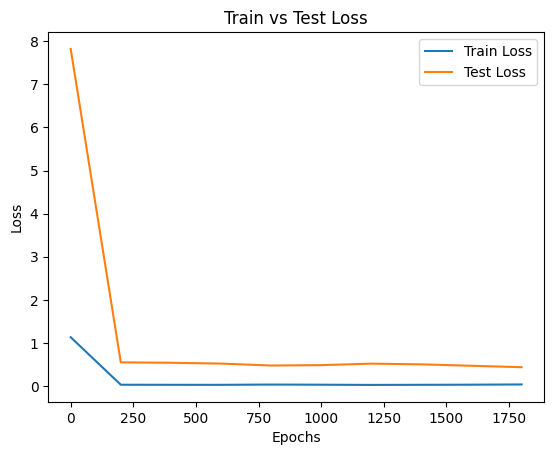

In [2687]:
import numpy as np
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

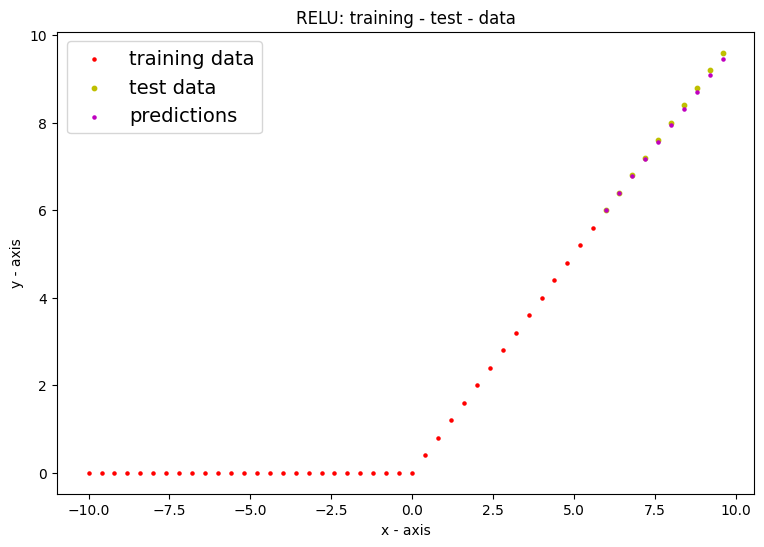

In [2688]:
with torch.inference_mode():
  yr_preds_new = model_2(A_test.unsqueeze(1))
plotting_data(A_train, A_test, yr_train, yr_test, "RELU", predictions=yr_preds_new)

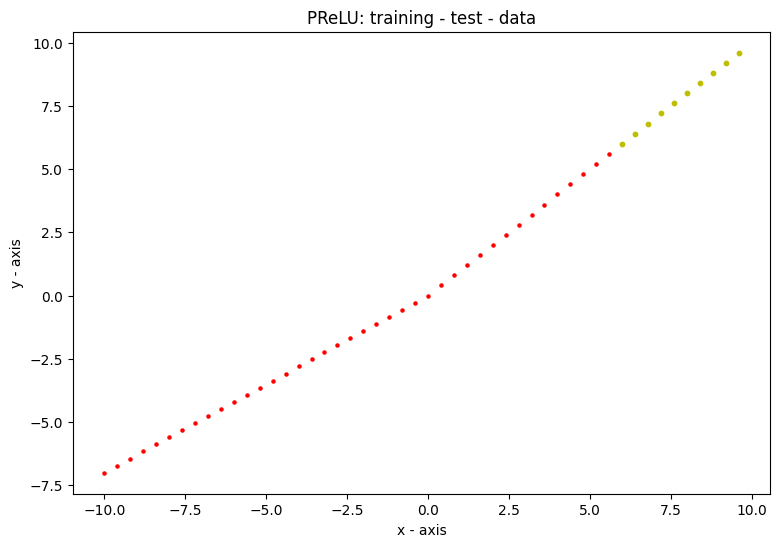

In [2689]:
weight = 0.7
A1 = torch.arange(-10, 10, 0.4, dtype=torch.float32)
y1 = torch.maximum(torch.tensor(0), A1) + weight * torch.minimum(torch.tensor(0), A1)
train_split = int(0.8 * len(A1))

#A1.to(device="cuda")
#y1.to(device="cuda")

A1_train, A1_test = A1[:train_split], A1[train_split:]
y1_train, y1_test = y1[:train_split], y1[train_split:]


plotting_data(A1_train, A1_test, y1_train, y1_test, "PReLU")

In [2690]:
class PreluPredictionModelV1(nn.Module):
  def __init__(self, input_features, output_features, model=None):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [2691]:
model_3 = PreluPredictionModelV1(input_features=1, output_features=1, model="cuda")
model_3.to(device)

PreluPredictionModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [2692]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                        lr=0.01)

In [2693]:
torch.manual_seed(42)

epochs = 5000

epochs_count = []
loss_values = []
test_loss_values = []

A1_train, A1_test = A1_train.to(device), A1_test.to(device)
y1_train, y1_test = y1_train.to(device), y1_test.to(device)

A1_train = A1_train.unsqueeze(1)
A1_test = A1_test.unsqueeze(1)
y1_train = y1_train.unsqueeze(1)
y1_test = y1_test.unsqueeze(1)


for epoch in range(epochs):
  model_3.train()
  y1_pred = model_3(A1_train)
  loss = loss_fn(y1_pred, y1_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  if epoch % 500 == 0:
    test_preds = model_3(A1_test)
    test_loss = loss_fn(test_preds, y1_test)
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 3.3644776344299316 | Test Loss: 7.9429216384887695
Epoch: 500 | Loss: 0.3702695965766907 | Test Loss: 0.1032659038901329
Epoch: 1000 | Loss: 0.2509232461452484 | Test Loss: 0.1200251579284668
Epoch: 1500 | Loss: 0.14073866605758667 | Test Loss: 0.2898019850254059
Epoch: 2000 | Loss: 0.19236283004283905 | Test Loss: 0.3903449475765228
Epoch: 2500 | Loss: 0.2584153711795807 | Test Loss: 0.4307635426521301
Epoch: 3000 | Loss: 0.32114559412002563 | Test Loss: 0.0032135010696947575
Epoch: 3500 | Loss: 0.3513425290584564 | Test Loss: 0.15922145545482635
Epoch: 4000 | Loss: 0.3471214175224304 | Test Loss: 0.024963712319731712
Epoch: 4500 | Loss: 0.07284470647573471 | Test Loss: 0.18911810219287872


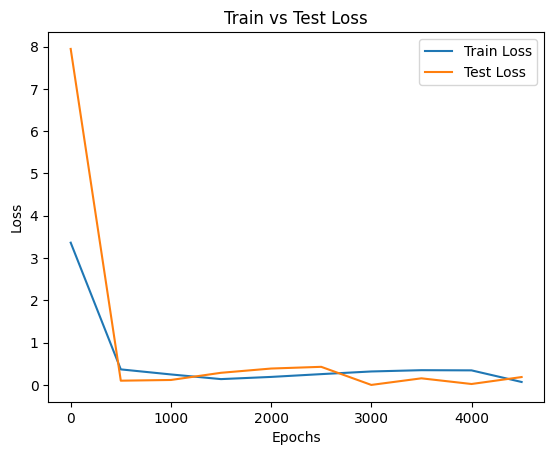

In [2694]:
import numpy as np
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();


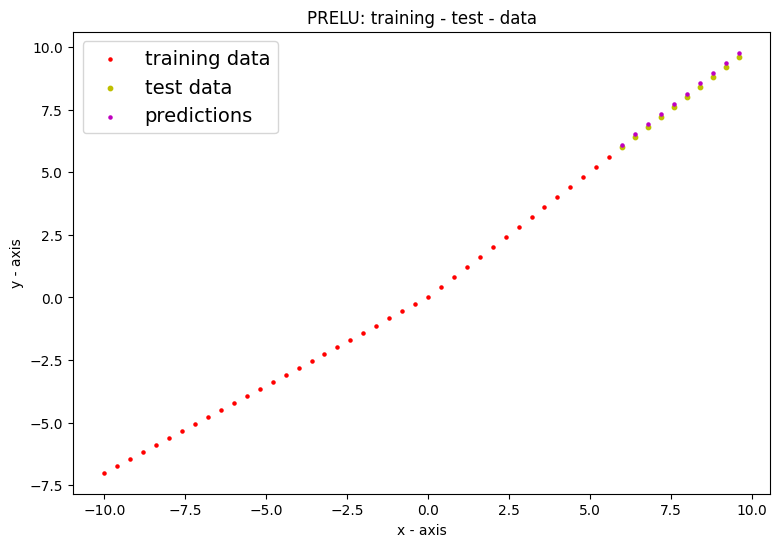

In [2695]:
with torch.inference_mode():
  y_preds_new = model_3(A1_test)
plotting_data(A1_train, A1_test, y1_train, y1_test, "PRELU", predictions=y_preds_new)

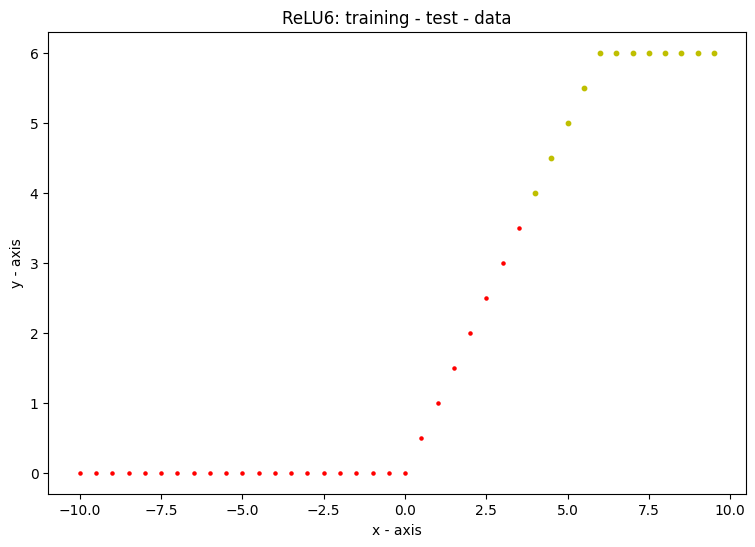

In [2696]:
A2 = torch.arange(-10, 10, 0.5, dtype=torch.float32)
y2 = torch.minimum(torch.maximum(torch.tensor(0), A2), torch.tensor(6))

train_split = int(0.7 * len(A2))
A2_train, A2_test = A2[:train_split], A2[train_split:]
y2_train, y2_test = y2[:train_split], y2[train_split:]

plotting_data(A2_train, A2_test, y2_train, y2_test, "ReLU6")

In [2697]:
class Relu6FunctionModelV1(nn.Module):
  def __init__(self, input_features, output_features, device=None):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=32),
        nn.Hardtanh(min_val=0.0, max_val=5.5),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=64),
        nn.Hardtanh(min_val=0.0, max_val=5.5),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [2698]:
model_4 = Relu6FunctionModelV1(input_features=1, output_features=1)
model_4.to(device)

Relu6FunctionModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): Hardtanh(min_val=0.0, max_val=5.5)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): Hardtanh(min_val=0.0, max_val=5.5)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [2699]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.01)

In [2700]:
torch.manual_seed(42)

epochs = 10000

epochs_count = []
loss_values = []
test_loss_values = []

A2_train, A2_test = A2_train.to(device), A2_test.to(device)
y2_train, y2_test = y2_train.to(device), y2_test.to(device)

A2_train = A2_train.unsqueeze(1)
A2_test = A2_test.unsqueeze(1)
y2_train = y2_train.unsqueeze(1)
y2_test = y2_test.unsqueeze(1)

for epoch in range(epochs):
  model_4.train()
  y2_pred = model_4(A2_train)
  loss = loss_fn(y2_pred, y2_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_preds = model_4(A2_test)
    test_loss = loss_fn(test_preds, y2_test)

    if epoch % 500 == 0:
      epochs_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss {test_loss}")

Epoch: 0 | Loss: 0.7798742055892944 | Test Loss 5.9054341316223145
Epoch: 500 | Loss: 0.021547457203269005 | Test Loss 0.2377818077802658
Epoch: 1000 | Loss: 0.030502665787935257 | Test Loss 0.08647307008504868
Epoch: 1500 | Loss: 0.02436177246272564 | Test Loss 0.0784120187163353
Epoch: 2000 | Loss: 0.026708727702498436 | Test Loss 0.11032018810510635
Epoch: 2500 | Loss: 0.021006792783737183 | Test Loss 0.09247744083404541
Epoch: 3000 | Loss: 0.025108149275183678 | Test Loss 0.12897668778896332
Epoch: 3500 | Loss: 0.02424476481974125 | Test Loss 0.14051608741283417
Epoch: 4000 | Loss: 0.02272399142384529 | Test Loss 0.14020806550979614
Epoch: 4500 | Loss: 0.022939743474125862 | Test Loss 0.15248365700244904
Epoch: 5000 | Loss: 0.014368669129908085 | Test Loss 0.11024248600006104
Epoch: 5500 | Loss: 0.016122199594974518 | Test Loss 0.12646467983722687
Epoch: 6000 | Loss: 0.019127164036035538 | Test Loss 0.14473502337932587
Epoch: 6500 | Loss: 0.019583556801080704 | Test Loss 0.15758615

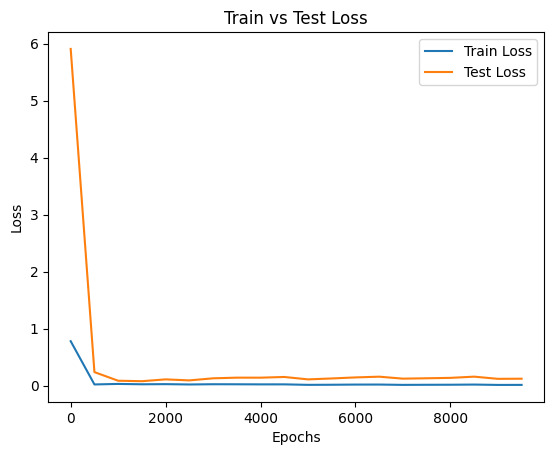

In [2701]:
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

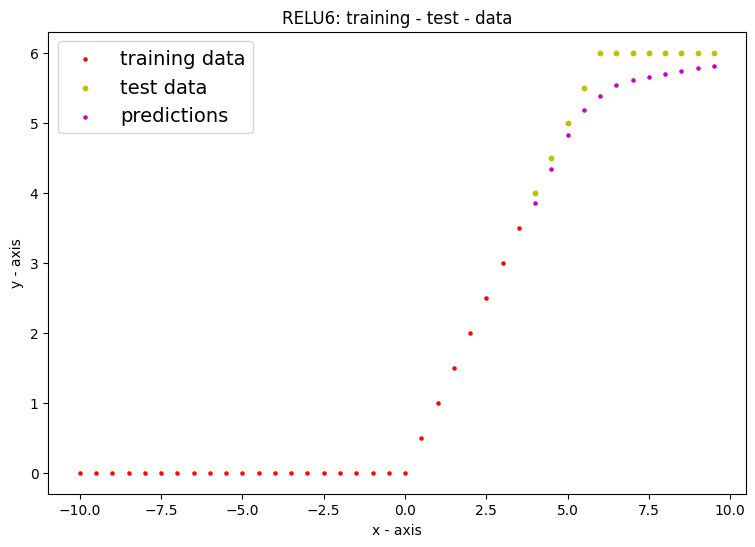

In [2702]:
with torch.inference_mode():
  y2_preds_new = model_4(A2_test)
plotting_data(A2_train, A2_test, y2_train, y2_test, "RELU6", predictions=y2_preds_new)

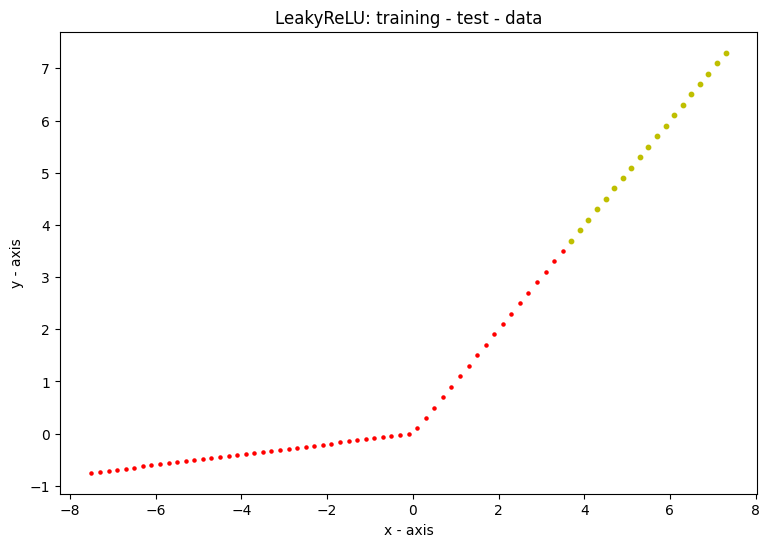

In [2703]:
ns = torch.tensor(1e-1)
A9 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y9 = torch.maximum(torch.tensor(0), A9) + ns * torch.minimum(torch.tensor(0), A9)

train_split = int(0.75 * len(A9))

A9_train, A9_test = A9[:train_split], A9[train_split:]
y9_train, y9_test = y9[:train_split], y9[train_split:]

plotting_data(A9_train, A9_test, y9_train, y9_test, "LeakyReLU")

In [2704]:
class LeakyReluModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

In [2705]:
model_5 = LeakyReluModelV1(input_features=1, output_features=1)
model_5

LeakyReluModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [2706]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.01)

In [2707]:
torch.manual_seed(123)

epochs = 2000

A9_train, A9_test = A9_train.to(device), A9_test.to(device)
y9_train, y9_test = y9_train.to(device), y9_test.to(device)

A9_train = A9_train.unsqueeze(1)
A9_test = A9_test.unsqueeze(1)
y9_train = y9_train.unsqueeze(1)
y9_test = y9_test.unsqueeze(1)

epochs_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_5.train()
  y_pred = model_5(A9_train)
  loss = loss_fn(y_pred, y9_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    test_pred = model_5(A9_test)
    loss_pred = loss_fn(test_pred, y9_test)

    if epoch % 200 == 0:
      epochs_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.7098108530044556 | Test Loss: 0.30199185013771057
Epoch: 200 | Loss: 0.04786789044737816 | Test Loss: 0.30199185013771057
Epoch: 400 | Loss: 0.03231894597411156 | Test Loss: 0.30199185013771057
Epoch: 600 | Loss: 0.027565376833081245 | Test Loss: 0.30199185013771057
Epoch: 800 | Loss: 0.03135276213288307 | Test Loss: 0.30199185013771057
Epoch: 1000 | Loss: 0.02607170306146145 | Test Loss: 0.30199185013771057
Epoch: 1200 | Loss: 0.0245684664696455 | Test Loss: 0.30199185013771057
Epoch: 1400 | Loss: 0.023693671450018883 | Test Loss: 0.30199185013771057
Epoch: 1600 | Loss: 0.0263547133654356 | Test Loss: 0.30199185013771057
Epoch: 1800 | Loss: 0.021847601979970932 | Test Loss: 0.30199185013771057


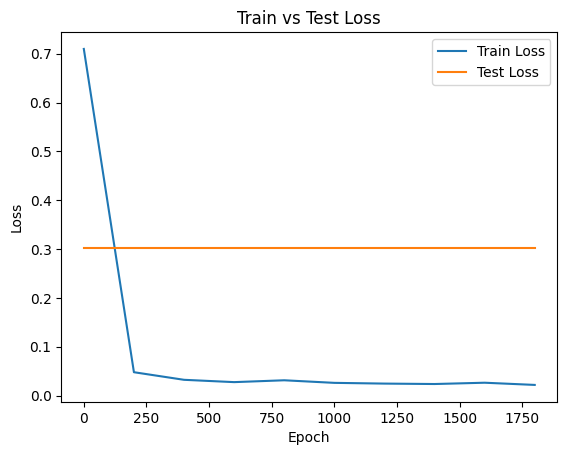

In [2708]:
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epochs_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();


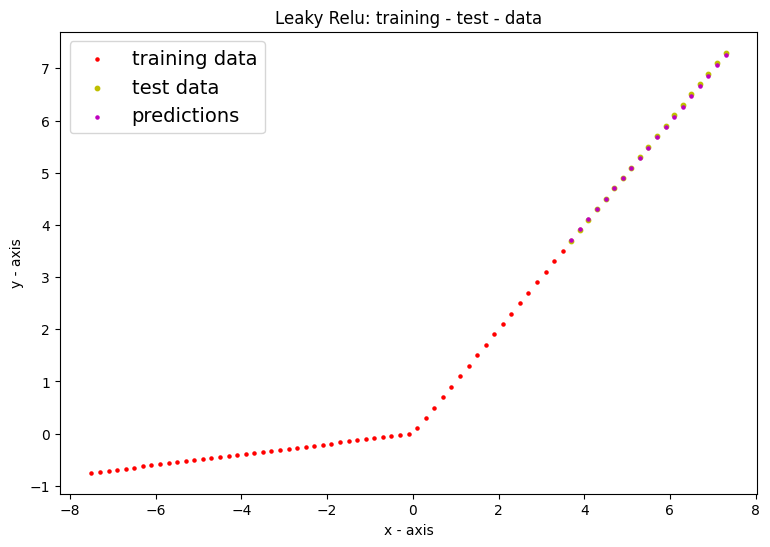

In [2709]:
with torch.inference_mode():
  y9_preds_new = model_5(A9_test)
plotting_data(A9_train, A9_test, y9_train, y9_test, "Leaky Relu", predictions=y9_preds_new)

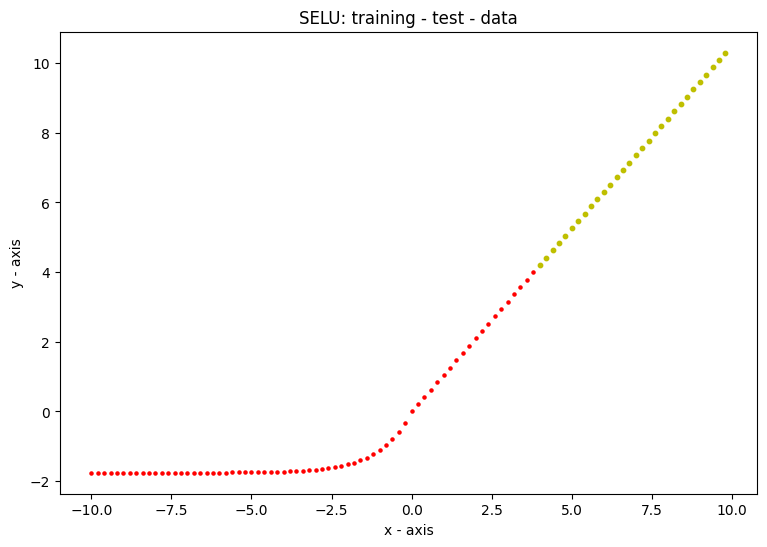

In [2710]:
a = 1.6732632423543772848170429916717
s = 1.0507009873554804934193349852946

A3 = torch.arange(-10, 10, 0.2)
y3 = s * (torch.maximum(torch.tensor(0), A3) + torch.minimum(torch.tensor(0), a * (torch.exp(A3) - torch.tensor(1))))

train_split = int(0.7 * len(A3))

A3_train, A3_test = A3[:train_split], A3[train_split:]
y3_train, y3_test = y3[:train_split], y3[train_split:]

plotting_data(A3_train, A3_test, y3_train, y3_test, "SELU")

1. build model
2. create instance
3. loss function and optimizer
4. training and test loop
5. plot training and test loss
6. generate new predictions
7. plot new predictions over graph

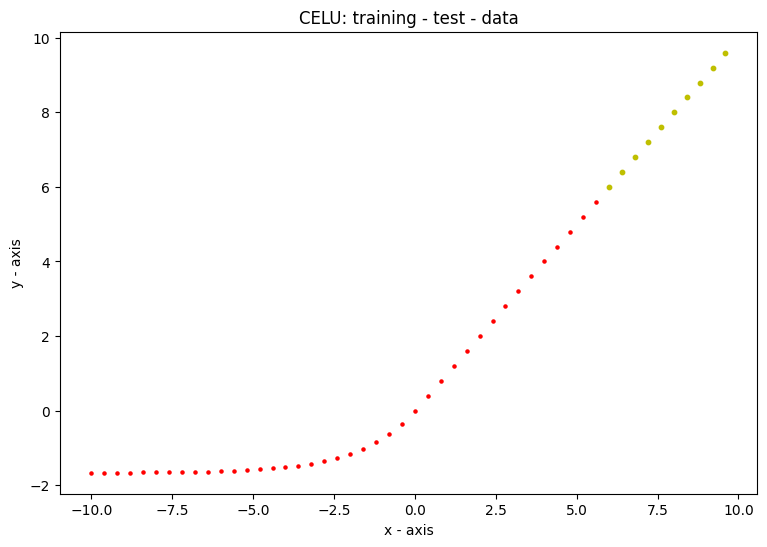

In [2711]:
A4 = torch.arange(-10, 10, 0.4, dtype=torch.float32)
y4 = torch.maximum(torch.tensor(0), A4) + torch.minimum(torch.tensor(0), a * (torch.exp(A4 / a) - torch.tensor(1)))

train_split = int(0.8 *len(A4))

A4_train, A4_test = A4[:train_split], A4[train_split:]
y4_train, y4_test = y4[:train_split], y4[train_split:]

plotting_data(A4_train, A4_test, y4_train, y4_test, "CELU")

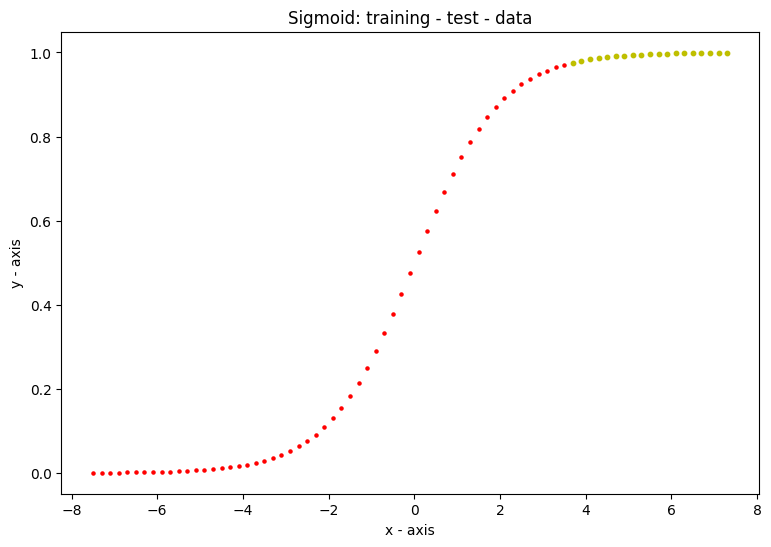

In [2712]:
A6 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y6 = torch.tensor(1) / (torch.tensor(1) + torch.exp(-A6))

train_split = int(0.75 * len(A6))

A6_train, A6_test = A6[:train_split], A6[train_split:]
y6_train, y6_test = y6[:train_split], y6[train_split:]

plotting_data(A6_train, A6_test, y6_train, y6_test, "Sigmoid")

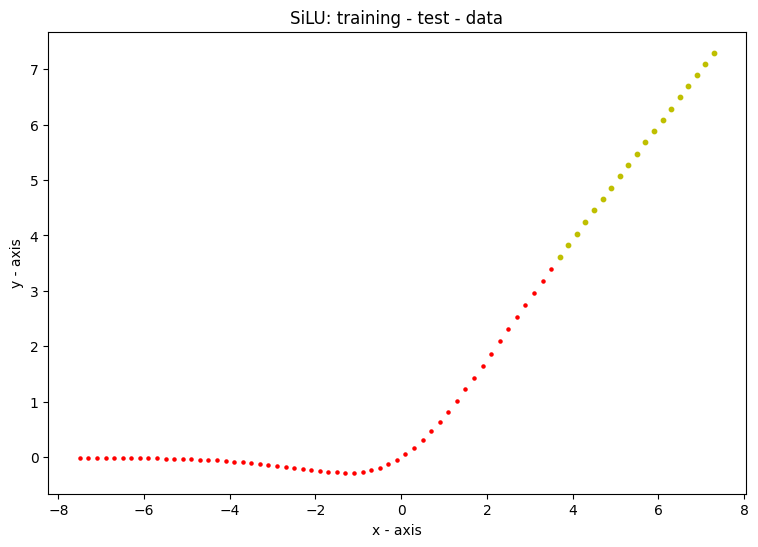

In [2713]:
A7 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y7 = A7 * y6

train_split = int(0.75 * len(A7))

A7_train, A7_test = A7[:train_split], A7[train_split:]
y7_train, y7_test = y7[:train_split], y7[train_split:]

plotting_data(A7_train, A7_test, y7_train, y7_test, "SiLU")

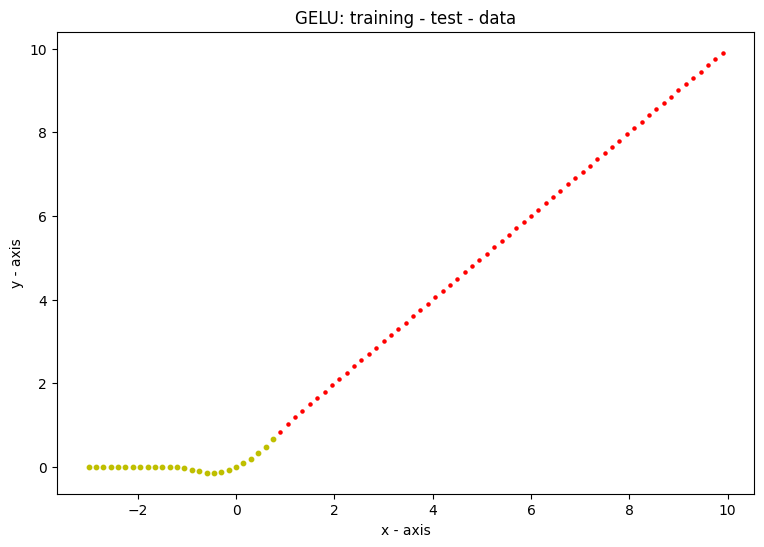

In [2714]:
# torch.tanh
# torch.sqrt
# torch.pi
# 4**3

A5 = torch.arange(-3, 10, 0.15, dtype=torch.float32)
y5 = torch.tensor(0.5) * A5 *(torch.tensor(1) + torch.tanh(torch.sqrt(torch.tensor(2)/torch.pi) * (A5 + torch.tensor(0.044715) + A5**3)))

train_split = int(0.3 * len(A5))

A5_train, A5_test = A5[train_split:], A5[:train_split]
y5_train, y5_test = y5[train_split:], y5[:train_split]

plotting_data(A5_train, A5_test, y5_train, y5_test, "GELU")

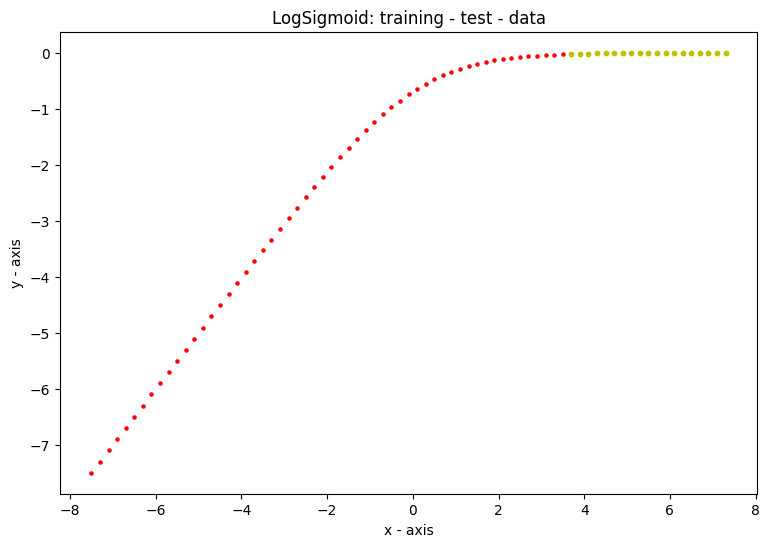

In [2715]:
#torch.log
A8 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y8 = torch.log(torch.tensor(1) / (torch.tensor(1) + torch.exp(-A8)))

train_split = int(0.75 * len(A8))

A8_train, A8_test = A8[:train_split], A8[train_split:]
y8_train, y8_test = y8[:train_split], y8[train_split:]

plotting_data(A8_train, A8_test, y8_train, y8_test, "LogSigmoid")

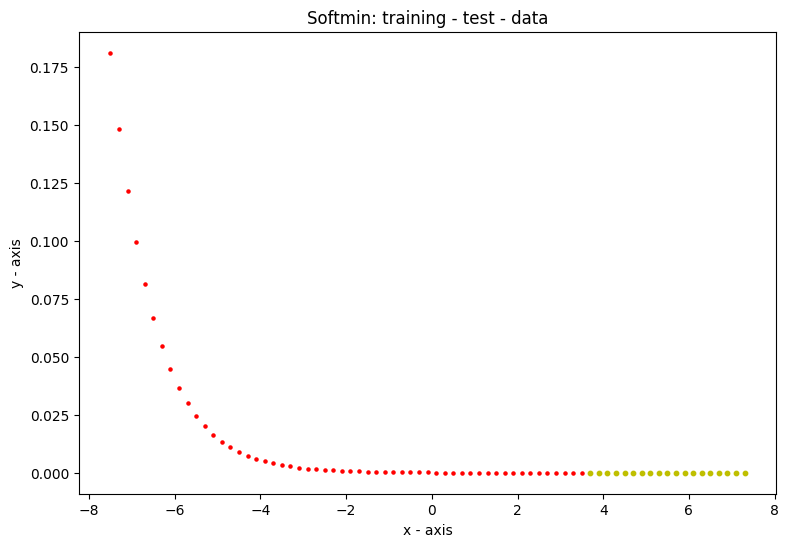

In [2716]:
A10 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y10 = torch.exp(-A10) / (sum(torch.exp(-A10)))

train_split = int(0.75 * len(A10))

A10_train, A10_test = A10[:train_split], A10[train_split:]
y10_train, y10_test = y10[:train_split], y10[train_split:]

plotting_data(A10_train, A10_test, y10_train, y10_test, "Softmin")

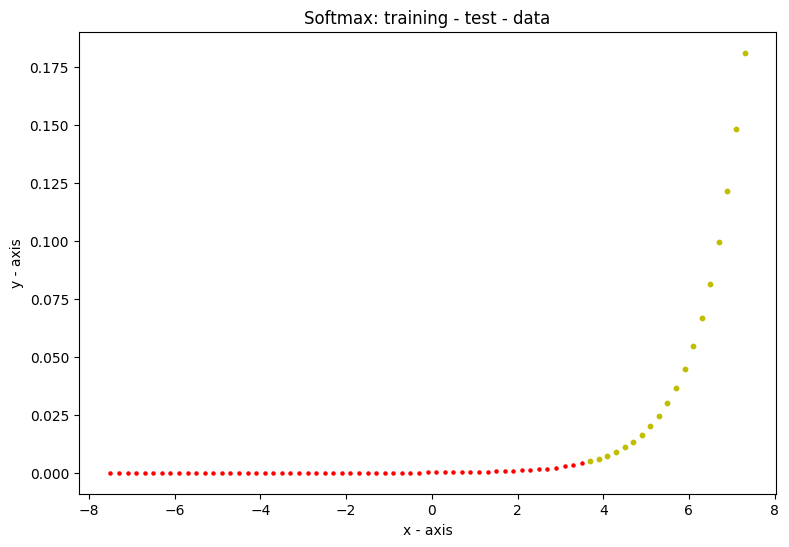

In [2717]:
A11 = torch.arange(-7.5, 7.5, 0.2, dtype=torch.float32)
y11 = torch.exp(A11) / (sum(torch.exp(A11)))

train_split = int(0.75 * len(A11))

A11_train, A11_test = A11[:train_split], A11[train_split:]
y11_train, y11_test = y11[:train_split], y11[train_split:]

plotting_data(A11_train, A11_test, y11_train, y11_test, "Softmax")